In [1]:
import numpy as np
from bitalg.visualizer.main import Visualizer
from functools import cmp_to_key

# 1. Przygotowanie zbiorów punktów

<h2>Funkcje do generacji zbiorów punktów</h2>

In [2]:
# Generate <amount> random points inside a rectangle of given corners
def randInRectangle(amount, corner1, corner2):
    xArray = np.random.uniform(corner1[0], corner2[0], amount)
    yArray = np.random.uniform(corner1[1], corner2[1], amount)
    pointsArray = [None for _ in range(amount)]
    for i in range(amount):
        pointsArray[i] = (xArray[i], yArray[i])
    return pointsArray

# Generate <amount> random points on a rectangle of given corners
def randOnRectangle(amount, corner1, corner2):
    lenSideX = abs(corner1[0] - corner2[0])
    lenSideY = abs(corner1[1] - corner2[1])
    lineCoordinates = np.random.uniform(0, 2*lenSideX + 2*lenSideY, amount)
    result = []
    for distance in lineCoordinates:
        baseCorner = None
        xToAdd = 0
        yToAdd = 0
        if distance < lenSideY:
            baseCorner = corner1
            yToAdd = distance
        elif distance < lenSideY + lenSideX:
            baseCorner = corner2
            xToAdd = -distance + lenSideY
        elif distance < 2 * lenSideY + lenSideX:
            baseCorner = corner2
            yToAdd = -distance + lenSideY + lenSideX
        else:
            baseCorner = corner1
            xToAdd = distance - 2*lenSideY - lenSideX
        result.append((baseCorner[0] + xToAdd, baseCorner[1] + yToAdd))
    return result

# Generate <amount> random points on a circle of given center and radius
def randOnCircle(amount, center, radius):
    return [(center[0] + radius * np.cos(angle), center[1] + radius * np.sin(angle)) for angle in np.random.uniform(0, 2*np.pi, amount)]

# Generate <amount> random points on a line between two given points
def randOnLine(amount, point1, point2):
    vector = (point2[0] - point1[0], point2[1] - point1[1])
    return [(point1[0] + t*vector[0], point1[1] + t*vector[1]) for t in np.random.uniform(0, 1, amount)]

def generateSetD(lowerLeft, upperLeft, lowerRight, upperRight, axisAmount, diagAmount):
    result = [lowerLeft, upperLeft, lowerRight, upperRight]
    result += randOnLine(axisAmount, lowerLeft, upperLeft)
    result += randOnLine(axisAmount, lowerLeft, lowerRight)
    result += randOnLine(diagAmount, lowerLeft, upperRight)
    result += randOnLine(diagAmount, upperLeft, lowerRight)
    return result

<h2>Wygenerowanie zbiorów punktów</h2>

a) 100 punktów o współrzędnych z przedziału [-100;100]

In [3]:
pointsA = randInRectangle(100, (-100,-100), (100,100))

a) (zmodyfikowane) 2137 punktów o współrzędnych z przedziału [-69;420]

In [4]:
pointsModifiedA = randInRectangle(2137, (-69,-69), (420,420))

b) 100 punktów na okręgu o środku (0,0) i promieniu R=10

In [5]:
pointsB = randOnCircle(100, (0,0), 10)

b) (zmodyfikowane) 666 punktów na okręgu o środku (2017,-5342) i promieniu R=138

In [6]:
pointsModifiedB = randOnCircle(666, (2017,-5342), 138)

c) 100 punktów na bokach prostokąta o wierzchołkach (-10,10), (-10,-10), (10,-10), (10,10)

In [7]:
pointsC = randOnRectangle(100, (-10,-10), (10,10))

c) (zmodyfikowane) 17 punktów na bokach prostokąta o wierzchołkach (-1,200), (-1,490), (53,200), (53,490)

In [8]:
pointsModifiedC = randOnRectangle(17, (-1,200), (53,490))

d) zbiór zawierający wierzchołki kwadratu (0,0), (10,0), (10,10), (0,10) oraz po 25 punktów na tych bokach kwadratu, które są współliniowe z osiami i po 20 punktów na przekątnych kwadratu

In [9]:
pointsD = generateSetD((0,0), (0,10), (10,0), (10,10), 25, 20)

d) (zmodyfikowane) zbiór zawierający wierzchołki kwadratu (0,0), (169,0), (169,23), (0,23) oraz po 3 punkty na tych bokach kwadratu, które są współliniowe z osiami i po 117 punktów na przekątnych kwadratu

In [10]:
pointsModifiedD = generateSetD((0,0), (0,23), (169,0), (169,23), 3, 117)

# 2. Wizualizacja utworzonych zbiorów punktów

<h2>Funkcja rysowania punktów</h2>

In [11]:
def drawPoints(points):
    canvas = Visualizer()
    canvas.add_point(points)
    canvas.show()

<h2>Rysowanie zbiorów</h2>

a) 100 punktów o współrzędnych z przedziału [-100;100]

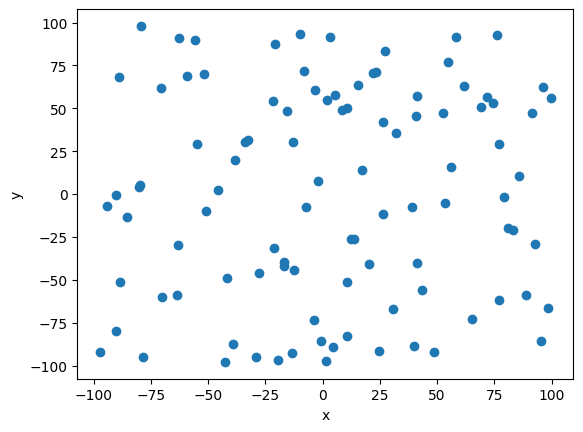

In [12]:
drawPoints(pointsA)

a) (zmodyfikowane) 2137 punktów o współrzędnych z przedziału [-69;420]

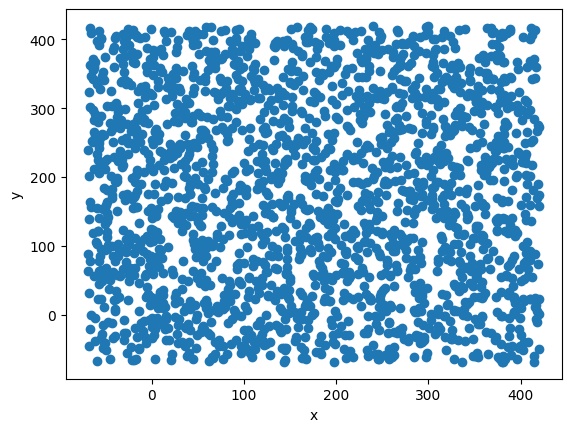

In [13]:
drawPoints(pointsModifiedA)

b) 100 punktów na okręgu o środku (0,0) i promieniu R=10

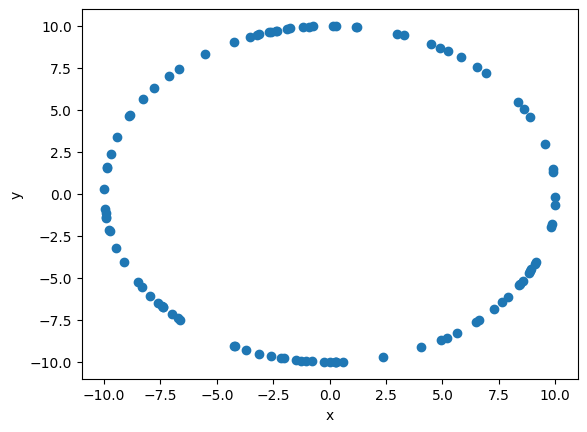

In [14]:
drawPoints(pointsB)

b) (zmodyfikowane) 666 punktów na okręgu o środku (2017,-5342) i promieniu R=138

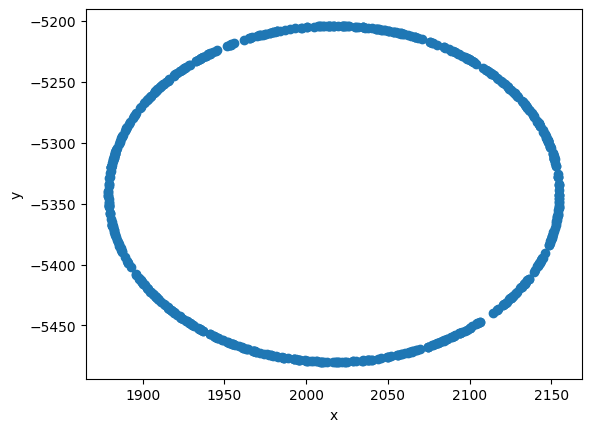

In [15]:
drawPoints(pointsModifiedB)

c) 100 punktów na bokach prostokąta o wierzchołkach (-10,10), (-10,-10), (10,-10), (10,10)

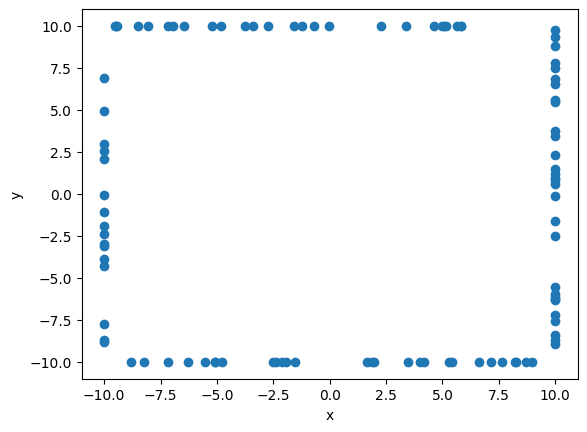

In [16]:
drawPoints(pointsC)

c) (zmodyfikowane) 17 punktów na bokach prostokąta o wierzchołkach (-1,200), (-1,490), (53,200), (53,490)

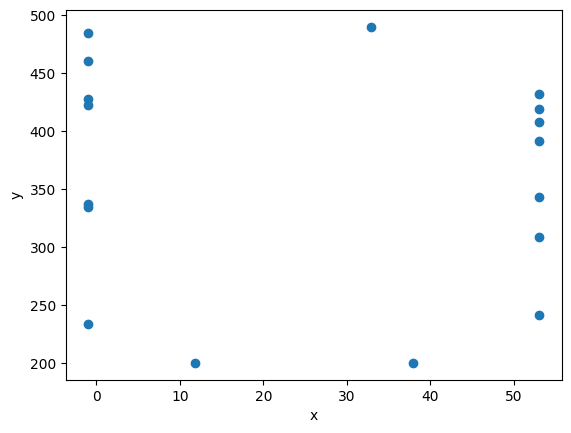

In [17]:
drawPoints(pointsModifiedC)

d) zbiór zawierający wierzchołki kwadratu (0,0), (10,0), (10,10), (0,10) oraz po 25 punktów na tych bokach kwadratu, które są współliniowe z osiami i po 20 punktów na przekątnych kwadratu

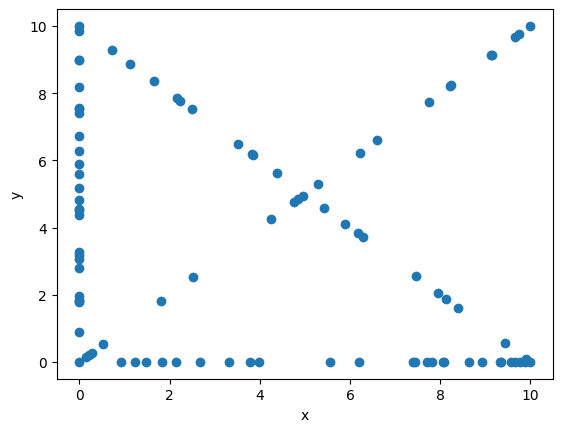

In [18]:
drawPoints(pointsD)

d) (zmodyfikowane) zbiór zawierający wierzchołki kwadratu (0,0), (169,0), (169,23), (0,23) oraz po 3 punkty na tych bokach kwadratu, które są współliniowe z osiami i po 117 punktów na przekątnych kwadratu

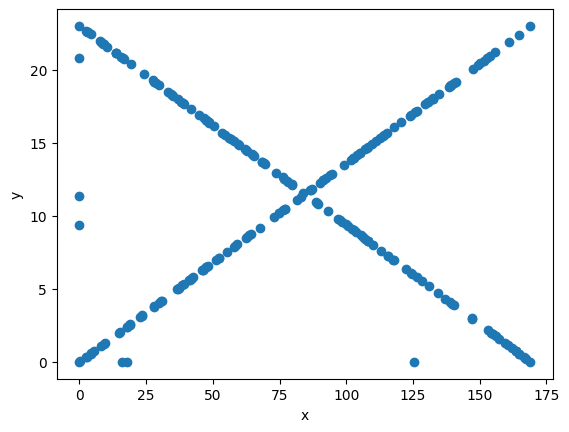

In [19]:
drawPoints(pointsModifiedD)

# 3. Znajdowanie otoczki wypukłej

<h2>Implementacja algorytmu Grahama oraz Jarvisa</h2>

In [20]:
EPS = 1e-10 # Zero tolerance

# Finds base point to start either algorithm with and returns it alongside array of remaining points
def findBasePoint(pointsSet, primaryCoordinate, secondaryCoordinate):
    basePointIndex = 0
    basePoint = pointsSet[0]
    for index, point in enumerate(pointsSet[1:]):
        primCoordDiff = point[primaryCoordinate] - basePoint[primaryCoordinate]
        if primCoordDiff < -EPS:
            basePointIndex = index
            basePoint = point
        elif abs(primCoordDiff) <= EPS:
            if point[secondaryCoordinate] < basePoint[secondaryCoordinate]:
                basePointIndex = index
                basePoint = point
    return basePointIndex + 1, basePoint

# Determinant of a 2x2 matrix
def det(a, b, c):
    return (a[0] - c[0]) * (b[1] - c[1]) - (a[1] - c[1]) * (b[0] - c[0])

# Determine whether points are placed in a counterclockwise motion
def ccw(basePoint, point1, point2):
    d = det(basePoint, point1, point2)
    if d > EPS:
        return True
    return False

# Determine whether points are colinear
def colinear(basePoint, point1, point2):
    d = det(basePoint, point1, point2)
    if abs(d) < EPS:
        return True
    return False

# Returns distance between two points
def dist(point1, point2):
    return np.linalg.norm(np.array(point1) - np.array(point2))

# Graham algorithm
def graham(pointsSet):
    # Find point with lowest y coordinate
    _, basePoint = findBasePoint(pointsSet, 1, 0)

    # Sort remaining points by relative angle to the base point
    points = [point for point in pointsSet if point != basePoint]
    points = sorted(points, key=cmp_to_key(lambda point1, point2: -det(basePoint, point1, point2)))

    # Remove collinear points apart from the farthest away from base point
    remainingPoints = [points[0]]
    for point in points:
        if not colinear(basePoint, remainingPoints[-1], point):
            remainingPoints.append(point)
        elif dist(basePoint, remainingPoints[-1]) < dist(basePoint, point):
            remainingPoints[-1] = point

    # Build convex hull
    convexHull = [basePoint, remainingPoints[0], remainingPoints[1]]
    for point in remainingPoints[2:]:
        # Remove wrong points from the convex hull
        while len(convexHull) > 1 and not ccw(convexHull[-2], convexHull[-1], point):
            convexHull.pop()
        # Add new point to the convex hull
        convexHull.append(point)

    return convexHull

# Jarvis algorithm
def jarvis(pointsSet):
    pointsAmount = len(pointsSet)
    
    # Find point with the lowest x coordinate
    basePointIndex, basePoint = findBasePoint(pointsSet, 0, 1)

    # Build convex hull
    convexHull = []
    p = basePointIndex
    q = -1
    c = 0
    while q != basePointIndex:
        convexHull.append(pointsSet[p])
        q = (p + 1) % pointsAmount
        for i in range(pointsAmount):
            point1 = pointsSet[p]
            point2 = pointsSet[i]
            point3 = pointsSet[q]
            # If the new triplet is counterclockwise or colinear with the new point being further away from the base
            # then replace the point with the new one
            if ccw(point1, point2, point3) or (colinear(point1, point2, point3) and dist(point1, point2) > dist(point1, point3)):
                q = i
        p = q

    return convexHull

<h2>Uruchomienie algorytmów Grahama oraz Jarvisa dla wygenerowanych zbiorów</h2>

In [21]:
class Result:
    def __init__(self, name, resultGraham, resultJarvis, timeGraham, timeJarvis):
        self.name = name
        self.resultGraham = resultGraham
        self.resultJarvis = resultJarvis
        self.timeGraham = timeGraham
        self.timeJarvis = timeJarvis

# Save results to file
def saveResultsToFile(filePath, results):
    pass

# Array containing results for every set
setResults = []

# 